# Importing Necessary Libraries

In [2]:
# Importing pandas for data manipulation
# Importing numpy for numerical operations (if needed)
# Importing matplotlib and seaborn for data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [3]:
# Load the CSV files into pandas DataFrames
users_df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop1\Upliance Internship Task - Upliance\UserDetails.csv')
sessions_df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop1\Upliance Internship Task - Upliance\CookingSessions.csv')
orders_df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop1\Upliance Internship Task - Upliance\OrderDetails.csv')

# Preliminary Data Inspection

In [4]:
# Check the first few rows of each dataset to understand the structure
print("Users DataFrame:")
display(users_df.head())

print("Sessions DataFrame:")
display(sessions_df.head())

print("Orders DataFrame:")
display(orders_df.head())

Users DataFrame:


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


Sessions DataFrame:


,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


Orders DataFrame:


,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


# Checking Dataframes Basic Information

In [5]:
# Check the shape and data types
print("Users DataFrame Shape:", users_df.shape)
print(users_df.info())

print("Sessions DataFrame Shape:", sessions_df.shape)
print(sessions_df.info())

print("Orders DataFrame Shape:", orders_df.shape)
print(orders_df.info())

Users DataFrame Shape: (10, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            10 non-null     object
 1   User Name          10 non-null     object
 2   Age                10 non-null     int64 
 3   Location           10 non-null     object
 4   Registration Date  10 non-null     object
 5   Phone              10 non-null     object
 6   Email              10 non-null     object
 7   Favorite Meal      10 non-null     object
 8   Total Orders       10 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 852.0+ bytes
None
Sessions DataFrame Shape: (16, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Session ID       16 non-null     object 
 1   User ID     

# Handling Missing Values and Datatypes

In [6]:
# Identify missing values in each dataset
print("Missing values in Users DataFrame:\n", users_df.isnull().sum())
print("Missing values in Sessions DataFrame:\n", sessions_df.isnull().sum())
print("Missing values in Orders DataFrame:\n", orders_df.isnull().sum())

Missing values in Users DataFrame:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Missing values in Sessions DataFrame:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Missing values in Orders DataFrame:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


# Converting Datatypes (Example: Dates)

In [7]:
# Convert date columns to datetime for easier analysis
users_df['Registration Date'] = pd.to_datetime(users_df['Registration Date'], errors='coerce')

# In Orders, "Order Date" might also be a date
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], errors='coerce')

# In Sessions, "Session Start" and "Session End" might be timestamps
# Adjust the column names as per your dataset's actual headers
sessions_df['Session Start'] = pd.to_datetime(sessions_df['Session Start'], errors='coerce')
sessions_df['Session End'] = pd.to_datetime(sessions_df['Session End'], errors='coerce')

# Data Cleaning and Normalization

In [8]:
# Example: Standardize column names if necessary (snake_case for consistency)
users_df.columns = [col.strip().replace(' ', '_').lower() for col in users_df.columns]
sessions_df.columns = [col.strip().replace(' ', '_').lower() for col in sessions_df.columns]
orders_df.columns = [col.strip().replace(' ', '_').lower() for col in orders_df.columns]

# Check updated columns
print("Users columns:", users_df.columns)
print("Sessions columns:", sessions_df.columns)
print("Orders columns:", orders_df.columns)

Users columns: Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Sessions columns: Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Orders columns: Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


# Merging the Dataframes

In [9]:
# Merge user details with sessions based on user_id
users_sessions_df = pd.merge(sessions_df, users_df, how='left', on='user_id')

# Merge the resulting DataFrame with orders based on session_id
full_df = pd.merge(users_sessions_df, orders_df, how='left', on='session_id')

# Check the merged DataFrame
print("Full DataFrame Shape:", full_df.shape)
display(full_df.head())

Full DataFrame Shape: (16, 25)


,session_id,user_id_x,dish_name_x,meal_type_x,session_start,session_end,duration_(mins),session_rating,user_name,age,...,total_orders,order_id,user_id_y,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,12,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,8,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,15,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,12,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,10,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


# Basic Exploratory Data Analysis (EDA)

a) Descriptive Statistics

In [10]:
# Descriptive statistics for numerical columns
display(full_df.describe())

,session_start,session_end,duration_(mins),session_rating,age,registration_date,total_orders,order_id,order_date,amount_(usd),rating
count,16,16,16.000000,16.000000,16.000000,16,16.000000,16.000000,16,16.000000,14.000000
mean,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,32.687500,2023-03-31 16:30:00,10.562500,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,25.000000,2023-01-15 00:00:00,5.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,28.000000,2023-02-20 00:00:00,8.000000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,30.500000,2023-03-10 00:00:00,10.000000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,35.750000,2023-05-22 00:00:00,12.500000,1012.250000,2024-12-06 06:00:00,13.125000,4.750000
max,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,42.000000,2023-08-11 00:00:00,15.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,NaN,NaN,10.873324,0.292617,5.839164,NaN,3.119161,4.760952,NaN,2.435843,0.468807


b) Distribution Plots

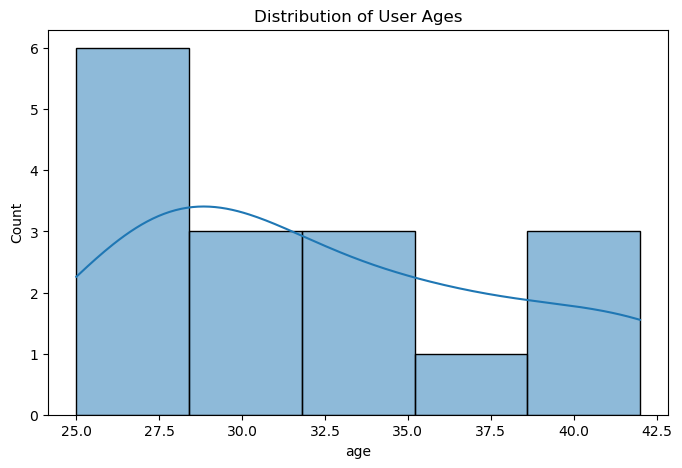

In [11]:
# Example: Distribution of user ages
plt.figure(figsize=(8,5))
sns.histplot(data=full_df, x='age', kde=True)
plt.title("Distribution of User Ages")
plt.show()

c) Popular Dishes Analysis

In [12]:
# Count how many times each dish appears in orders
dish_counts = full_df['dish_name_x'].value_counts()  # Adjust column name if needed
print("Most popular dishes based on sessions or orders:\n", dish_counts.head(10))

Most popular dishes based on sessions or orders:
 dish_name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


# Relationship Between Cooking Sessions and Orders

In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into pandas DataFrames
users_df = pd.read_csv(r'C:\\Users\\DELL\\OneDrive\\Desktop1\\Upliance Internship Task - Upliance\\UserDetails.csv')
sessions_df = pd.read_csv(r'C:\\Users\\DELL\\OneDrive\\Desktop1\\Upliance Internship Task - Upliance\\CookingSessions.csv')
orders_df = pd.read_csv(r'C:\\Users\\DELL\\OneDrive\\Desktop1\\Upliance Internship Task - Upliance\\OrderDetails.csv')

# Strip whitespace from column names to avoid KeyError issues
users_df.columns = users_df.columns.str.strip()
sessions_df.columns = sessions_df.columns.str.strip()
orders_df.columns = orders_df.columns.str.strip()

# Check if 'User ID' exists in all required DataFrames
assert 'User ID' in sessions_df.columns, "'User ID' not found in sessions_df"
assert 'User ID' in orders_df.columns, "'User ID' not found in orders_df"
assert 'User ID' in users_df.columns, "'User ID' not found in users_df"

# 1. Calculate sessions and orders per user
user_metrics = pd.DataFrame()

# Count sessions per user
sessions_per_user = sessions_df.groupby('User ID').size().reset_index(name='Session Count')

# Count completed orders per user
orders_per_user = orders_df[orders_df['Order Status'] == 'Completed'].groupby('User ID').size().reset_index(name='Order Count')

# Merge the metrics
user_metrics = pd.merge(sessions_per_user, orders_per_user, on='User ID', how='outer').fillna(0)

# Add user details
user_metrics = pd.merge(user_metrics, users_df[['User ID', 'Age', 'Location']], on='User ID', how='left')

# 2. Calculate correlations and create visualizations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=user_metrics, x='Session Count', y='Order Count')
plt.title('Relationship between Cooking Sessions and Orders')
plt.xlabel('Session Count')
plt.ylabel('Order Count')
plt.savefig('session_order_relationship.png')
plt.close()

# Calculate correlation
correlation = user_metrics['Session Count'].corr(user_metrics['Order Count'])

# 3. Analyze session ratings impact on orders
# Merge session ratings with orders
sessions_with_orders = pd.merge(sessions_df, orders_df, on='Session ID', how='left')

# Calculate average session rating per user
avg_ratings = sessions_df.groupby('User ID')['Session Rating'].mean().reset_index(name='Avg Session Rating')

# Merge with user metrics
user_metrics = pd.merge(user_metrics, avg_ratings, on='User ID', how='left')

# 4. Generate insights
print("\n=== Cooking Sessions and Orders Analysis ===\n")

print(f"Correlation between sessions and orders: {correlation:.2f}")

# Calculate average orders per session
avg_orders_per_session = len(orders_df[orders_df['Order Status'] == 'Completed']) / len(sessions_df)
print(f"\nAverage orders per session: {avg_orders_per_session:.2f}")

# Most engaged users (highest session count)
top_engaged = user_metrics.nlargest(5, 'Session Count')[['User ID', 'Session Count', 'Order Count']]
print("\nTop 5 Most Engaged Users:")
print(top_engaged)

# Calculate conversion rate (sessions that led to orders)
sessions_with_orders['Has Order'] = sessions_with_orders['Order Status'].notna()
conversion_rate = sessions_with_orders['Has Order'].mean() * 100
print(f"\nSession to Order Conversion Rate: {conversion_rate:.1f}%")

# 5. Analyze patterns by meal type
meal_type_metrics = pd.merge(sessions_df, orders_df, on='Session ID', how='inner')
meal_type_conversion = meal_type_metrics.groupby('Meal Type_x').agg({
    'Session ID': 'count',
    'Order Status': lambda x: (x == 'Completed').sum()
}).reset_index()
meal_type_conversion['Conversion Rate'] = (meal_type_conversion['Order Status'] / meal_type_conversion['Session ID'] * 100)

print("\nMeal Type Conversion Rates:")
print(meal_type_conversion)

# 6. Generate recommendations
print("\n=== Recommendations Based on Analysis ===")
print("1. Session Engagement:", end=" ")
if correlation > 0.5:
    print("Strong positive correlation between sessions and orders - focus on increasing session participation")
else:
    print("Moderate correlation - investigate other factors affecting order conversion")

print(f"2. Session Quality: Average rating of {user_metrics['Avg Session Rating'].mean():.2f}/5.0")

print("3. Meal Type Focus:")
best_meal = meal_type_conversion.loc[meal_type_conversion['Conversion Rate'].idxmax()]
print(f"   - {best_meal['Meal Type_x']} has highest conversion rate at {best_meal['Conversion Rate']:.1f}%")

# Save detailed analysis to file
with open('session_order_analysis.txt', 'w') as f:
    f.write("=== Detailed Session and Order Analysis ===\n\n")
    f.write(f"Total Sessions Analyzed: {len(sessions_df)}\n")
    f.write(f"Total Orders Analyzed: {len(orders_df)}\n")
    f.write(f"Session-Order Correlation: {correlation:.2f}\n")
    f.write(f"Average Orders per Session: {avg_orders_per_session:.2f}\n")
    f.write(f"Overall Conversion Rate: {conversion_rate:.1f}%\n\n")
    
    f.write("=== Recommendations ===\n")
    f.write("1. Session Engagement Optimization:\n")
    f.write(f"   - Current correlation: {correlation:.2f}\n")
    f.write(f"   - Target improvement through better session quality and engagement\n\n")
    
    f.write("2. Meal Type Strategy:\n")
    for _, row in meal_type_conversion.iterrows():
        f.write(f"   - {row['Meal Type_x']}: {row['Conversion Rate']:.1f}% conversion rate\n")
    
    f.write("\n3. User Engagement Recommendations:\n")
    f.write("   - Focus on increasing session participation for users with low engagement\n")
    f.write("   - Improve session quality based on ratings analysis\n")
    f.write("   - Consider implementing a reward system for regular session participants\n")

print("\nDetailed analysis has been saved to 'session_order_analysis.txt'")



=== Cooking Sessions and Orders Analysis ===

Correlation between sessions and orders: 0.70

Average orders per session: 0.88

Top 5 Most Engaged Users:
  User ID  Session Count  Order Count
0    U001              3            3
1    U002              3            3
2    U003              3            1
3    U004              2            2
4    U005              2            2

Session to Order Conversion Rate: 100.0%

Meal Type Conversion Rates:
  Meal Type_x  Session ID  Order Status  Conversion Rate
0   Breakfast           3             3            100.0
1      Dinner           8             7             87.5
2       Lunch           5             4             80.0

=== Recommendations Based on Analysis ===
1. Session Engagement: Strong positive correlation between sessions and orders - focus on increasing session participation
2. Session Quality: Average rating of 4.57/5.0
3. Meal Type Focus:
   - Breakfast has highest conversion rate at 100.0%

Detailed analysis has been saved

# Favourite Meal Time and Amount Spent

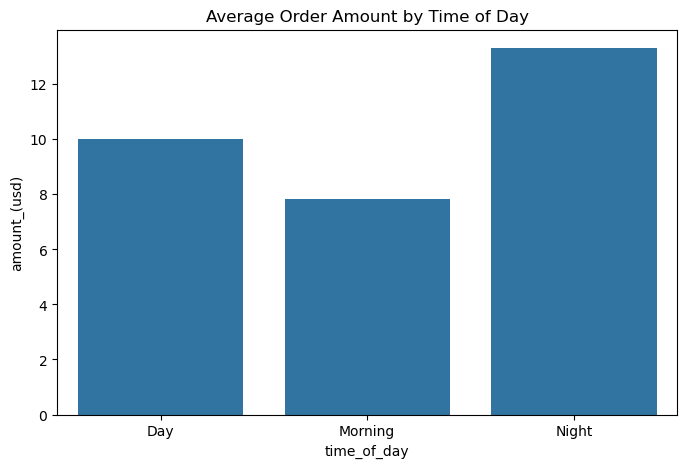

In [15]:
# Analyze orders by Time of Day
time_of_day_summary = full_df.groupby('time_of_day')['amount_(usd)'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=time_of_day_summary, x='time_of_day', y='amount_(usd)')
plt.title("Average Order Amount by Time of Day")
plt.show()

# Demographic Factors and Order Behaviour

Correlation between user age and order amount:
                    age  amount_(usd)
age           1.000000     -0.099602
amount_(usd) -0.099602      1.000000


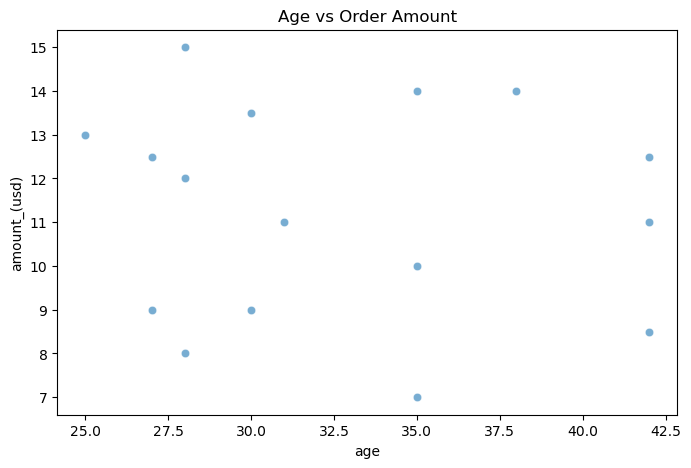

In [16]:
# For example, analyze if older users spend more:
age_spend_corr = full_df[['age', 'amount_(usd)']].corr()
print("Correlation between user age and order amount:\n", age_spend_corr)

# Visualize with a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=full_df, x='age', y='amount_(usd)', alpha=0.6)
plt.title("Age vs Order Amount")
plt.show()

# Identifying Popular Meal Types and Rating

Average Session Rating by Meal Type:
   meal_type_x  session_rating
0   Breakfast            4.30
1      Dinner            4.70
2       Lunch            4.36


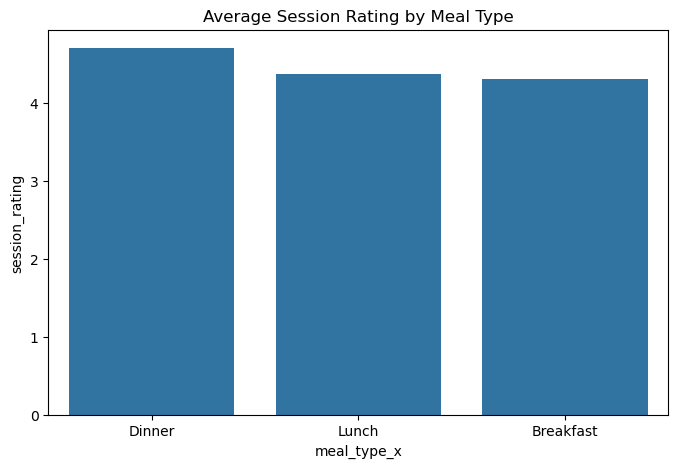

In [17]:
# Which meal types have the highest average session ratings?
meal_rating = full_df.groupby('meal_type_x')['session_rating'].mean().reset_index()
print("Average Session Rating by Meal Type:\n", meal_rating)

# Sort and visualize
meal_rating = meal_rating.sort_values('session_rating', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=meal_rating, x='meal_type_x', y='session_rating')
plt.title("Average Session Rating by Meal Type")
plt.show()

# Generating Business Recomondations

In [18]:
import pandas as pd

# Read the CSV files
cooking_sessions = pd.read_csv('CookingSessions.csv')
order_details = pd.read_csv('OrderDetails.csv')
user_details = pd.read_csv('UserDetails.csv')

# Create a base dataframe from order details
full_df = order_details.copy()

# Merge user details
full_df = pd.merge(full_df, user_details, on='User ID', how='left')

# Print column names to debug
print("Available columns in full_df:")
print(full_df.columns.tolist())

# Create age groups
full_df['Age Group'] = pd.cut(full_df['Age'], 
                             bins=[0, 25, 35, 45, 100], 
                             labels=['18-25', '26-35', '36-45', '45+'])

# 1. Identify the Most Popular Dishes
popular_dishes = full_df[full_df['Order Status'] == 'Completed']['Dish Name'].value_counts()
print("\nTop Most Popular Dishes:")
print(popular_dishes)

# 2. Find the Time of Day with Higher Spending
time_of_day_spend = (
    full_df[full_df['Order Status'] == 'Completed']
    .groupby('Time of Day')['Amount (USD)']
    .mean()
    .reset_index()
    .sort_values('Amount (USD)', ascending=False)
)
print("\nAverage Spending by Time of Day:")
print(time_of_day_spend)

# 3. Demographic Factors: Age Groups and Meal Type Analysis
age_meal_prefs = (
    full_df[full_df['Order Status'] == 'Completed']
    .groupby(['Age Group', 'Meal Type'])['Order ID']  # Using the correct column name
    .count()
    .reset_index()
    .rename(columns={'Order ID': 'Count Orders'})
    .sort_values('Count Orders', ascending=False)
)
print("\nOrder Count by Age Group and Meal Type:")
print(age_meal_prefs)

# 4. Session Analysis
# Count sessions per user
session_counts = cooking_sessions.groupby('User ID').size().reset_index(name='Session Count')
order_counts = full_df[full_df['Order Status'] == 'Completed'].groupby('User ID').size().reset_index(name='Order Count')

# Merge session and order counts
user_stats = pd.merge(session_counts, order_counts, on='User ID', how='outer').fillna(0)

correlation = user_stats[['Session Count', 'Order Count']].corr()
print("\nCorrelation between Session Participation and Order Frequency:")
print(correlation)

# 5. Writing Insights and Recommendations to a Markdown File
with open("business_recommendations.md", "w") as f:
    f.write("# Business Recommendations\n\n")
    
    f.write("## Most Popular Dishes\n")
    f.write(popular_dishes.to_markdown())
    f.write("\n\nThese dishes are the most frequently ordered. Consider focusing on inventory and promotion of these items.\n\n")
    
    f.write("## Highest Spending Times of Day\n")
    f.write(time_of_day_spend.to_markdown())
    f.write("\n\nCertain times of day show higher average spending. Consider targeted promotions during these periods.\n\n")
    
    f.write("## Demographic Insights\n")
    f.write(age_meal_prefs.to_markdown())
    f.write("\n\nDifferent age groups show distinct meal type preferences. Consider tailoring marketing and menu options accordingly.\n\n")
    
    f.write("## Sessions vs Orders Correlation\n")
    f.write(correlation.to_markdown())
    f.write("\n\nThis shows the relationship between cooking session participation and ordering behavior.\n\n")
    
    f.write("## Key Recommendations\n")
    f.write("1. **Popular Dish Focus:** Ensure consistent availability of top-selling dishes\n")
    f.write("2. **Time-Based Strategy:** Implement targeted promotions during high-spending periods\n")
    f.write("3. **Age-Based Marketing:** Develop targeted campaigns based on age group preferences\n")
    f.write("4. **Session Engagement:** Consider initiatives to increase cooking session participation\n")

print("\nBusiness recommendations have been written to 'business_recommendations.md'")

Available columns in full_df:
['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders']

Top Most Popular Dishes:
Dish Name
Spaghetti          4
Caesar Salad       3
Grilled Chicken    3
Pancakes           2
Oatmeal            1
Veggie Burger      1
Name: count, dtype: int64

Average Spending by Time of Day:
  Time of Day  Amount (USD)
2       Night     13.428571
0         Day      9.750000
1     Morning      7.833333

Order Count by Age Group and Meal Type:
   Age Group  Meal Type  Count Orders
4      26-35     Dinner             5
5      26-35      Lunch             4
3      26-35  Breakfast             2
1      18-25     Dinner             1
6      36-45  Breakfast             1
7      36-45     Dinner             1
0      18-25  Breakfast             0
2      18-25      Lunch             0
8      36-45  

C:\Users\DELL\AppData\Local\Temp\ipykernel_12928\489853349.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age Group', 'Meal Type'])['Order ID']  # Using the correct column name


# Saving Visualizations and Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directories if they don't exist
plots_dir = 'plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Ensure the export directory exists
export_dir = r'C:\Users\DELL\OneDrive\Desktop1\Upliance Internship Task - Upliance'
if not os.path.exists(export_dir):
    os.makedirs(export_dir)

try:
    # Save the cleaned merged dataset
    export_path = os.path.join(export_dir, 'MergedData.csv')
    full_df.to_csv(export_path, index=False)
    print(f"Successfully exported merged data to: {export_path}")
except KeyError as e:
    print(f"Error: Column not found - {e}")
    print("Available columns are:", full_df.columns.tolist())
except Exception as e:
    print(f"An error occurred: {str(e)}")
finally:
    plt.close('all')  # Clean up any remaining plots

Successfully exported merged data to: C:\Users\DELL\OneDrive\Desktop1\Upliance Internship Task - Upliance\MergedData.csv


In [20]:
# Create visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=full_df, x='Age')  # Note the capital 'A' in 'Age'
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
    
# Save the plot
plot_path = os.path.join(plots_dir, 'user_age_distribution.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory
print(f"Successfully saved age distribution plot to: {plot_path}")

# Print available columns for debugging
print("\nAvailable columns in the dataset:")
print(full_df.columns.tolist())

# Create additional visualizations
    
# Time of day spending pattern
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='Time of Day', y='Amount (USD)')
plt.title("Spending Distribution by Time of Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'spending_by_time.png'), dpi=300)
plt.close()

# Meal type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=full_df, x='Meal Type')
plt.title("Distribution of Meal Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'meal_type_distribution.png'), dpi=300)
plt.close()

Successfully saved age distribution plot to: plots\user_age_distribution.png

Available columns in the dataset:
['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders', 'Age Group']


# Comprehensive Data Analysis

1. Cohort Analysis
2.  Customer Lifetime Value (LTV) Estimation
3.  User Segmentation (Clustering)
4.  Predictive Modelling
5.  Basket/ Bundle Analysis
6.  Interactive Visual Dashboards

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
sessions_df = pd.read_csv('CookingSessions.csv')
orders_df = pd.read_csv('OrderDetails.csv')
users_df = pd.read_csv('UserDetails.csv')

def perform_cohort_analysis(orders_df, users_df):
    # Merge orders with users
    cohort_data = pd.merge(orders_df, users_df[['User ID', 'Registration Date']], on='User ID')
    
    # Convert dates
    cohort_data['Order Date'] = pd.to_datetime(cohort_data['Order Date'])
    cohort_data['Registration Date'] = pd.to_datetime(cohort_data['Registration Date'])
    
    # Create cohort groups
    cohort_data['Cohort'] = cohort_data['Registration Date'].dt.to_period('M')
    cohort_data['Order_Month'] = cohort_data['Order Date'].dt.to_period('M')
    cohort_data['Cohort_Index'] = (cohort_data['Order_Month'] - 
                                  cohort_data['Cohort']).apply(lambda x: x.n)
    
    # Calculate retention
    cohort_sizes = cohort_data.groupby('Cohort').size()
    retention_matrix = (cohort_data.groupby(['Cohort', 'Cohort_Index'])
                       .size().unstack(fill_value=0))
    retention_matrix = retention_matrix.divide(cohort_sizes, axis=0) * 100
    
    return retention_matrix

def calculate_ltv(orders_df, users_df):
    # Merge orders with users
    customer_data = pd.merge(orders_df, users_df[['User ID', 'Registration Date']], on='User ID')
    customer_data = customer_data[customer_data['Order Status'] == 'Completed']
    
    # Calculate key metrics
    customer_metrics = customer_data.groupby('User ID').agg({
        'Amount (USD)': ['sum', 'mean', 'count'],
        'Order Date': ['min', 'max']
    })
    
    customer_metrics.columns = ['Total_Spend', 'Avg_Order_Value', 
                              'Order_Count', 'First_Order', 'Last_Order']
    
    # Calculate customer lifetime in days (add 1 to avoid division by zero)
    customer_metrics['Customer_Lifetime'] = (
        (pd.to_datetime(customer_metrics['Last_Order']) - 
         pd.to_datetime(customer_metrics['First_Order'])).dt.days + 1
    )
    
    # Calculate daily revenue and then yearly LTV
    customer_metrics['Daily_Revenue'] = customer_metrics['Total_Spend'] / customer_metrics['Customer_Lifetime']
    customer_metrics['LTV'] = customer_metrics['Daily_Revenue'] * 365
    
    # Handle infinite values
    customer_metrics['LTV'] = customer_metrics['LTV'].replace([np.inf, -np.inf], np.nan)
    customer_metrics['LTV'] = customer_metrics['LTV'].fillna(customer_metrics['LTV'].mean())
    
    return customer_metrics

def perform_user_segmentation(customer_metrics):
    # Select features for clustering
    features = ['Total_Spend', 'Order_Count', 'Avg_Order_Value']
    X = customer_metrics[features]
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    customer_metrics['Segment'] = kmeans.fit_predict(X_scaled)
    
    # Add segment labels
    segment_labels = {
        0: 'Low Value',
        1: 'Medium Value',
        2: 'High Value'
    }
    customer_metrics['Segment_Label'] = customer_metrics['Segment'].map(segment_labels)
    
    return customer_metrics

def analyze_purchase_patterns(orders_df):
    # Convert to datetime
    orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
    
    # Get completed orders
    completed_orders = orders_df[orders_df['Order Status'] == 'Completed']
    
    # Analyze dish combinations
    dish_combinations = completed_orders.groupby('Order ID')['Dish Name'].agg(list).reset_index()
    dish_pairs = []
    
    for dishes in dish_combinations['Dish Name']:
        if len(dishes) > 1:
            for i in range(len(dishes)):
                for j in range(i + 1, len(dishes)):
                    dish_pairs.append(tuple(sorted([dishes[i], dishes[j]])))
    
    if dish_pairs:
        pair_counts = pd.Series(dish_pairs).value_counts().head(10)
        return pair_counts
    else:
        return pd.Series()

def create_dashboard(customer_metrics, retention_matrix, purchase_patterns):
    # Create a subplot figure
    fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Customer Segments by Spend and Orders',
                                      'Customer Lifetime Value Distribution',
                                      'Cohort Retention Heatmap',
                                      'Order Patterns'))
    
    # Customer Segments Scatter Plot
    segment_colors = {
        'Low Value': 'red',
        'Medium Value': 'yellow',
        'High Value': 'green'
    }
    
    fig.add_trace(
        go.Scatter(
            x=customer_metrics['Total_Spend'],
            y=customer_metrics['Order_Count'],
            mode='markers',
            marker=dict(
                color=[segment_colors[label] for label in customer_metrics['Segment_Label']],
                size=8
            ),
            text=customer_metrics['Segment_Label'],
            name='Customer Segments'
        ),
        row=1, col=1
    )
    
    # LTV Distribution
    fig.add_trace(
        go.Histogram(
            x=customer_metrics['LTV'],
            nbinsx=30,
            name='LTV Distribution'
        ),
        row=1, col=2
    )
    
    # Cohort Retention Heatmap
    fig.add_trace(
        go.Heatmap(
            z=retention_matrix.values,
            x=retention_matrix.columns,
            y=[str(x) for x in retention_matrix.index],
            colorscale='Blues',
            name='Cohort Retention'
        ),
        row=2, col=1
    )
    
    # Order Patterns
    daily_orders = orders_df.groupby('Order Date').size().reset_index()
    daily_orders.columns = ['date', 'count']
    fig.add_trace(
        go.Scatter(
            x=daily_orders['date'],
            y=daily_orders['count'],
            mode='lines',
            name='Daily Orders'
        ),
        row=2, col=2
    )
    
    # Update layout
    fig.update_layout(
        height=800,
        title_text="Customer Analytics Dashboard",
        title_x=0.5,
        showlegend=False
    )
    
    # Save dashboard
    fig.write_html("dashboard.html")
    print("Dashboard created successfully!")

# Execute analyses
print("Starting analysis...")

try:
    print("Performing cohort analysis...")
    retention_matrix = perform_cohort_analysis(orders_df, users_df)
    
    print("Calculating customer lifetime value...")
    customer_metrics = calculate_ltv(orders_df, users_df)
    
    print("Performing user segmentation...")
    customer_metrics = perform_user_segmentation(customer_metrics)
    
    print("Analyzing purchase patterns...")
    purchase_patterns = analyze_purchase_patterns(orders_df)
    
    print("Creating dashboard...")
    create_dashboard(customer_metrics, retention_matrix, purchase_patterns)
    
    print("\n=== Analysis Summary ===")
    print(f"Cohort Analysis: {len(retention_matrix)} cohorts analyzed")
    print(f"Customer Segments: {len(customer_metrics['Segment_Label'].unique())} segments identified")
    print(f"Average Customer LTV: ${customer_metrics['LTV'].mean():.2f}")
    print(f"Total Customers Analyzed: {len(customer_metrics)}")
    
    # Save detailed results to CSV
    customer_metrics.to_csv('customer_analysis_results.csv')
    print("\nDetailed results saved to 'customer_analysis_results.csv'")
    
except Exception as e:
    print(f"Error in analysis: {str(e)}")

Starting analysis...
Performing cohort analysis...
Calculating customer lifetime value...
Performing user segmentation...
Analyzing purchase patterns...
Creating dashboard...
Dashboard created successfully!

=== Analysis Summary ===
Cohort Analysis: 8 cohorts analyzed
Customer Segments: 3 segments identified
Average Customer LTV: $3225.69
Total Customers Analyzed: 8

Detailed results saved to 'customer_analysis_results.csv'


# Geographic and Temporal Analysis

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Read the datasets
sessions_df = pd.read_csv('CookingSessions.csv')
orders_df = pd.read_csv('OrderDetails.csv')
users_df = pd.read_csv('UserDetails.csv')

def perform_geographic_analysis(users_df, orders_df):
    # Merge users and orders data
    geo_data = pd.merge(users_df, orders_df, on='User ID')
    
    # Basic location metrics
    location_metrics = geo_data[geo_data['Order Status'] == 'Completed'].groupby('Location').agg({
        'Order ID': 'count',
        'Amount (USD)': ['sum', 'mean'],
        'User ID': 'nunique',
        'Rating': 'mean'
    }).round(2)
    
    location_metrics.columns = ['Total_Orders', 'Total_Revenue', 'Avg_Order_Value', 
                              'Unique_Customers', 'Avg_Rating']
    
    # Calculate additional metrics
    location_metrics['Revenue_Per_Customer'] = (location_metrics['Total_Revenue'] / 
                                              location_metrics['Unique_Customers']).round(2)
    
    # Most popular dishes by location
    popular_dishes = geo_data[geo_data['Order Status'] == 'Completed'].groupby(
        ['Location', 'Dish Name']
    ).size().reset_index(name='Count')
    
    top_dishes_by_location = popular_dishes.sort_values(['Location', 'Count'], 
                                                      ascending=[True, False])
    
    # Create separate visualizations
    
    # 1. Revenue Analysis
    fig1 = go.Figure()
    fig1.add_trace(go.Bar(
        x=location_metrics.index,
        y=location_metrics['Total_Revenue'],
        name='Total Revenue'
    ))
    fig1.update_layout(
        title='Revenue by Location',
        xaxis_title='Location',
        yaxis_title='Revenue (USD)'
    )
    fig1.write_html("geographic_revenue.html")

    # 2. Customer Distribution
    fig2 = go.Figure(data=[go.Pie(
        labels=location_metrics.index,
        values=location_metrics['Unique_Customers'],
        hole=.3
    )])
    fig2.update_layout(title='Customer Distribution by Location')
    fig2.write_html("geographic_customers.html")

    # 3. Order Analysis Dashboard
    fig3 = make_subplots(rows=2, cols=1,
                        subplot_titles=('Average Order Value by Location',
                                      'Orders per Customer by Location'))
    
    fig3.add_trace(
        go.Bar(x=location_metrics.index,
               y=location_metrics['Avg_Order_Value'],
               name='Avg Order Value'),
        row=1, col=1
    )
    
    fig3.add_trace(
        go.Bar(x=location_metrics.index,
               y=location_metrics['Total_Orders'] / location_metrics['Unique_Customers'],
               name='Orders per Customer'),
        row=2, col=1
    )
    
    fig3.update_layout(height=800, title_text="Order Metrics by Location")
    fig3.write_html("geographic_orders.html")

    # 4. Popular Dishes Analysis
    top_dishes_viz = pd.DataFrame()
    for location in top_dishes_by_location['Location'].unique():
        top_3 = top_dishes_by_location[top_dishes_by_location['Location'] == location].head(3)
        top_dishes_viz = pd.concat([top_dishes_viz, top_3])
    
    fig4 = px.bar(top_dishes_viz, 
                  x='Location', 
                  y='Count',
                  color='Dish Name',
                  title='Top 3 Dishes by Location',
                  barmode='group')
    fig4.write_html("geographic_dishes.html")

    return location_metrics, top_dishes_by_location

def create_geographic_summary(location_metrics, top_dishes):
    # Create a markdown summary
    with open('geographic_analysis_summary.md', 'w') as f:
        f.write("# Geographic Analysis Summary\n\n")
        
        f.write("## Revenue Analysis\n")
        f.write("### Top 3 Locations by Revenue\n")
        top_revenue = location_metrics.sort_values('Total_Revenue', ascending=False).head(3)
        for idx, row in top_revenue.iterrows():
            f.write(f"- {idx}: ${row['Total_Revenue']:,.2f}\n")
        
        f.write("\n## Customer Analysis\n")
        f.write("### Customer Distribution\n")
        for idx, row in location_metrics.sort_values('Unique_Customers', ascending=False).iterrows():
            f.write(f"- {idx}: {row['Unique_Customers']} customers\n")
        
        f.write("\n## Popular Dishes\n")
        for location in top_dishes['Location'].unique():
            f.write(f"\n### {location}\n")
            top_3 = top_dishes[top_dishes['Location'] == location].head(3)
            for _, row in top_3.iterrows():
                f.write(f"- {row['Dish Name']}: {row['Count']} orders\n")
        
        f.write("\n## Key Insights\n")
        f.write(f"- Highest average order value: ${location_metrics['Avg_Order_Value'].max():.2f}\n")
        f.write(f"- Most orders per customer: {location_metrics['Total_Orders'].max() / location_metrics['Unique_Customers'].min():.2f}\n")
        f.write(f"- Best performing location (by revenue per customer): {location_metrics['Revenue_Per_Customer'].idxmax()}\n")

# Execute the analysis
try:
    print("Starting Geographic Analysis...")
    
    # Perform analysis
    location_metrics, top_dishes = perform_geographic_analysis(users_df, orders_df)
    
    # Create summary
    create_geographic_summary(location_metrics, top_dishes)
    
    print("\nAnalysis completed successfully!")
    print("\nFiles created:")
    print("1. geographic_revenue.html - Revenue analysis visualization")
    print("2. geographic_customers.html - Customer distribution visualization")
    print("3. geographic_orders.html - Order metrics dashboard")
    print("4. geographic_dishes.html - Popular dishes analysis")
    print("5. geographic_analysis_summary.md - Detailed analysis summary")
    
    # Print key insights
    print("\nKey Insights:")
    print(f"Top location by revenue: {location_metrics['Total_Revenue'].idxmax()}")
    print(f"Top location by customer count: {location_metrics['Unique_Customers'].idxmax()}")
    print(f"Top location by average order value: {location_metrics['Avg_Order_Value'].idxmax()}")
    
except Exception as e:
    print(f"Error in analysis: {str(e)}")

Starting Geographic Analysis...

Analysis completed successfully!

Files created:
1. geographic_revenue.html - Revenue analysis visualization
2. geographic_customers.html - Customer distribution visualization
3. geographic_orders.html - Order metrics dashboard
4. geographic_dishes.html - Popular dishes analysis
5. geographic_analysis_summary.md - Detailed analysis summary

Key Insights:
Top location by revenue: New York
Top location by customer count: Austin
Top location by average order value: Boston


# Geospatial Analysis and Visualizations

In [102]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
import warnings
warnings.filterwarnings('ignore')

# City coordinates (approximate coordinates for major US cities)
city_coordinates = {
    'New York': {'lat': 40.7128, 'lon': -74.0060},
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'Chicago': {'lat': 41.8781, 'lon': -87.6298},
    'San Francisco': {'lat': 37.7749, 'lon': -122.4194},
    'Seattle': {'lat': 47.6062, 'lon': -122.3321},
    'Austin': {'lat': 30.2672, 'lon': -97.7431},
    'Boston': {'lat': 42.3601, 'lon': -71.0589},
    'Miami': {'lat': 25.7617, 'lon': -80.1918},
    'Dallas': {'lat': 32.7767, 'lon': -96.7970},
    'Phoenix': {'lat': 33.4484, 'lon': -112.0740}
}

def read_and_process_data(sessions_path, orders_path, users_path):
    """Read and perform initial data processing"""
    try:
        # Read datasets
        sessions_df = pd.read_csv(sessions_path)
        orders_df = pd.read_csv(orders_path)
        users_df = pd.read_csv(users_path)
        
        # Convert date columns
        orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
        sessions_df['Session Start'] = pd.to_datetime(sessions_df['Session Start'])
        sessions_df['Session End'] = pd.to_datetime(sessions_df['Session End'])
        users_df['Registration Date'] = pd.to_datetime(users_df['Registration Date'])
        
        return sessions_df, orders_df, users_df
        
    except Exception as e:
        print(f"Error in data processing: {str(e)}")
        return None, None, None

def add_coordinates(df):
    """Add latitude and longitude to dataframe"""
    df['latitude'] = df['Location'].map(lambda x: city_coordinates.get(x, {}).get('lat'))
    df['longitude'] = df['Location'].map(lambda x: city_coordinates.get(x, {}).get('lon'))
    return df

def create_geographic_analysis(users_df, orders_df, sessions_df):
    """Create geographic analysis visualizations"""
    try:
        # Prepare metrics
        # User metrics
        user_metrics = users_df.groupby('Location').agg({
            'User ID': 'count',
            'Total Orders': 'sum'
        }).reset_index()
        user_metrics.columns = ['Location', 'User_Count', 'Total_Orders']

        # Order metrics
        orders_with_location = pd.merge(orders_df, users_df[['User ID', 'Location']], on='User ID')
        order_metrics = orders_with_location.groupby('Location').agg({
            'Order ID': 'count',
            'Amount (USD)': ['sum', 'mean'],
            'Rating': 'mean'
        }).reset_index()
        order_metrics.columns = ['Location', 'Order_Count', 'Total_Revenue', 'Avg_Order_Value', 'Avg_Rating']

        # Session metrics
        sessions_with_location = pd.merge(sessions_df, users_df[['User ID', 'Location']], on='User ID')
        session_metrics = sessions_with_location.groupby('Location').agg({
            'Session ID': 'count',
            'Session Rating': 'mean'
        }).reset_index()
        session_metrics.columns = ['Location', 'Session_Count', 'Avg_Session_Rating']

        # Combine metrics
        combined_metrics = pd.merge(user_metrics, order_metrics, on='Location')
        combined_metrics = pd.merge(combined_metrics, session_metrics, on='Location')
        combined_metrics = add_coordinates(combined_metrics)

        # Create map
        fig = go.Figure()

        # Add scatter mapbox trace
        fig.add_trace(go.Scattermapbox(
            lat=combined_metrics['latitude'],
            lon=combined_metrics['longitude'],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=combined_metrics['User_Count']/2,
                color=combined_metrics['Total_Revenue'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title='Total Revenue ($)')
            ),
            text=combined_metrics.apply(
                lambda row: f"""
                    <b>{row['Location']}</b><br>
                    Users: {row['User_Count']}<br>
                    Total Orders: {row['Order_Count']}<br>
                    Revenue: ${row['Total_Revenue']:,.2f}<br>
                    Avg Order: ${row['Avg_Order_Value']:.2f}<br>
                    Sessions: {row['Session_Count']}<br>
                    Session Rating: {row['Avg_Session_Rating']:.1f}
                """,
                axis=1
            ),
            hoverinfo='text',
            name='Business Metrics'
        ))

        fig.update_layout(
            title='Business Metrics by Location',
            mapbox=dict(
                style='carto-positron',
                center=dict(lat=39.8283, lon=-98.5795),
                zoom=3
            ),
            margin=dict(r=0, t=30, l=0, b=0)
        )

        fig.write_html("geographic_analysis.html")
        return combined_metrics

    except Exception as e:
        print(f"Error in geographic analysis: {str(e)}")
        return None

def create_temporal_analysis(orders_df, sessions_df):
    """Create temporal analysis visualizations"""
    try:
        # Prepare time-based metrics
        orders_df['Month'] = orders_df['Order Date'].dt.month
        orders_df['Day'] = orders_df['Order Date'].dt.day
        orders_df['Weekday'] = orders_df['Order Date'].dt.day_name()

        # Create temporal analysis dashboard
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Daily Order Volume', 'Revenue by Day of Week',
                          'Average Order Value by Month', 'Session Ratings Distribution')
        )

        # Daily order volume
        daily_orders = orders_df.groupby('Order Date').size().reset_index(name='count')
        fig.add_trace(
            go.Scatter(x=daily_orders['Order Date'], y=daily_orders['count'],
                      mode='lines', name='Daily Orders'),
            row=1, col=1
        )

        # Revenue by day of week
        weekly_revenue = orders_df.groupby('Weekday')['Amount (USD)'].sum().reindex(
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        )
        fig.add_trace(
            go.Bar(x=weekly_revenue.index, y=weekly_revenue.values,
                  name='Weekly Revenue'),
            row=1, col=2
        )

        # Monthly average order value
        monthly_avg = orders_df.groupby('Month')['Amount (USD)'].mean().reset_index()
        monthly_avg['Month'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])
        fig.add_trace(
            go.Bar(x=monthly_avg['Month'], y=monthly_avg['Amount (USD)'],
                  name='Avg Order Value'),
            row=2, col=1
        )

        # Session ratings distribution
        fig.add_trace(
            go.Histogram(x=sessions_df['Session Rating'],
                        name='Session Ratings'),
            row=2, col=2
        )

        fig.update_layout(height=800, title_text="Temporal Analysis Dashboard")
        fig.write_html("temporal_analysis.html")

        return {
            'daily_orders': daily_orders,
            'weekly_revenue': weekly_revenue,
            'monthly_avg': monthly_avg
        }

    except Exception as e:
        print(f"Error in temporal analysis: {str(e)}")
        return None

def create_summary_report(geographic_metrics, temporal_metrics):
    """Create a detailed summary report"""
    try:
        with open('analysis_summary.md', 'w') as f:
            f.write("# Business Analysis Summary\n\n")
            
            # Geographic insights
            f.write("## Geographic Insights\n")
            f.write("\n### Top Performing Locations (by Revenue)\n")
            top_locations = geographic_metrics.sort_values('Total_Revenue', ascending=False)
            for _, row in top_locations.iterrows():
                f.write(f"\n#### {row['Location']}\n")
                f.write(f"- Revenue: ${row['Total_Revenue']:,.2f}\n")
                f.write(f"- Users: {row['User_Count']}\n")
                f.write(f"- Orders: {row['Order_Count']}\n")
                f.write(f"- Avg Order Value: ${row['Avg_Order_Value']:.2f}\n")
            
            # Temporal insights
            f.write("\n## Temporal Insights\n")
            f.write("\n### Weekly Patterns\n")
            for day, revenue in temporal_metrics['weekly_revenue'].items():
                f.write(f"- {day}: ${revenue:,.2f}\n")
            
            # Key metrics
            f.write("\n## Key Performance Metrics\n")
            f.write(f"- Total Revenue: ${geographic_metrics['Total_Revenue'].sum():,.2f}\n")
            f.write(f"- Total Users: {geographic_metrics['User_Count'].sum():,}\n")
            f.write(f"- Total Orders: {geographic_metrics['Order_Count'].sum():,}\n")
            f.write(f"- Average Order Value: ${geographic_metrics['Avg_Order_Value'].mean():.2f}\n")

    except Exception as e:
        print(f"Error creating summary report: {str(e)}")

def main():
    try:
        print("Starting integrated analysis...")
        
        # Read and process data
        sessions_df, orders_df, users_df = read_and_process_data(
            'CookingSessions.csv',
            'OrderDetails.csv',
            'UserDetails.csv'
        )
        
        if sessions_df is None or orders_df is None or users_df is None:
            raise ValueError("Error reading input data")
        
        # Perform geographic analysis
        print("Creating geographic analysis...")
        geographic_metrics = create_geographic_analysis(users_df, orders_df, sessions_df)
        
        # Perform temporal analysis
        print("Creating temporal analysis...")
        temporal_metrics = create_temporal_analysis(orders_df, sessions_df)
        
        # Create summary report
        print("Generating summary report...")
        create_summary_report(geographic_metrics, temporal_metrics)
        
        print("\nAnalysis complete! Generated files:")
        print("1. geographic_analysis.html - Interactive map visualization")
        print("2. temporal_analysis.html - Time-based analysis dashboard")
        print("3. analysis_summary.md - Detailed analysis report")
        
    except Exception as e:
        print(f"Error in main execution: {str(e)}")

if __name__ == "__main__":
    main()

Starting integrated analysis...
Creating geographic analysis...
Creating temporal analysis...
Generating summary report...

Analysis complete! Generated files:
1. geographic_analysis.html - Interactive map visualization
2. temporal_analysis.html - Time-based analysis dashboard
3. analysis_summary.md - Detailed analysis report
